(2048, 3072, 3)


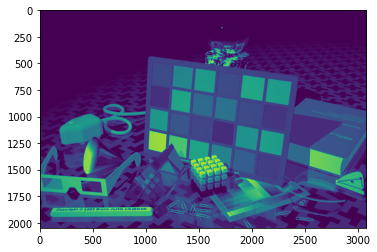

In [7]:
import os 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread("/Users/shreshthsaini/Desktop/DeltaE_8bit_gamma2.2.tif")
print(img.shape)

def filtering(img,kernel):
    operated = cv2.filter2D(img, -1, kernel)
    return operated

plt.imshow(img[:,:,0])


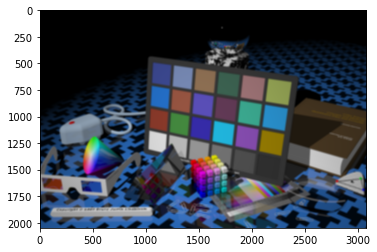

In [8]:

#mean filtering 
kernel = np.ones((20,20),np.float32)/(20*20)

#cv2.imshow('mean_blur.png', filtering(img, kernel))
#cv2.imwrite('mean_blur.png', filtering(img, kernel))

plt.imshow(filtering(img, kernel))


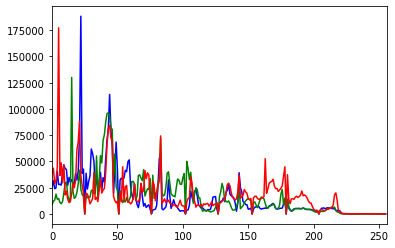

In [9]:
#np or plt histogram

#hist_cv = cv2.calcHist([img], [1], None, [256], [0,256])

#hist,bins = np.histogram(img.ravel(), 256,[0,256])
#plt.plot(hist, 'r')

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[10,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


In [10]:
x = np.zeros((256))
x_red = img[:,:,0].ravel()
for i in range(img.shape[0]*img.shape[1]):
    try: 
        x[int(x_red[i])] +=1
    except:
        print(i)


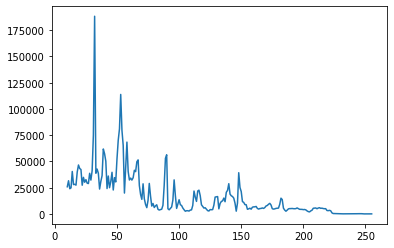

In [11]:
plt.plot(np.arange(10,256), x[10:])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


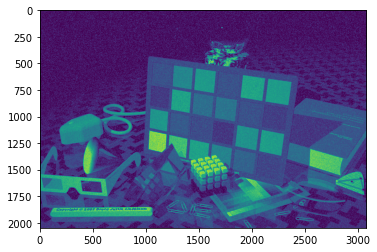

In [19]:
#add and remove salt and pepper noise

sp = 0.5 
amount = 0.10
size = img.shape
cop_img = np.copy(img)[:,:,0]
salt_loc = [np.random.randint(0, i-1, int(img[:,:,0].size*amount*sp)) for i in img[:,:,0].shape]
pep_loc = [np.random.randint(0, i-1, int(img[:,:,0].size*amount*(1-sp))) for i in img[:,:,0].shape]

cop_img[salt_loc] = 255
cop_img[pep_loc] = 0

plt.imshow(cop_img) 



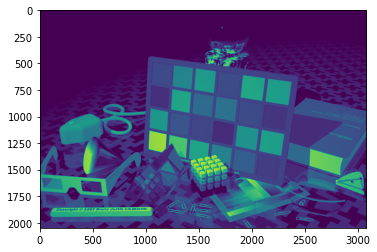

In [22]:
#remove salt and pepper noise  - median filter 

removed = cv2.medianBlur(cop_img,3) #run filter with np.median() on ravel
plt.imshow(removed) 


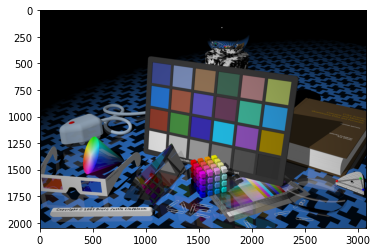

In [24]:

#check filtering 
kernel = np.zeros((3,3),np.float32)
kernel[1,2] = 1

#cv2.imshow('mean_blur.png', filtering(img, kernel))
#cv2.imwrite('mean_blur.png', filtering(img, kernel))

plt.imshow(filtering(img, kernel))

In [26]:
kernel

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)